In [16]:
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [17]:
# import EFTCAMB directly from local folder
camb_installation_path = './' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)

import camb
from camb import model, initialpower

# How to initialize and plot EFTmodels using pyEFTCAMB


### CHOOSE EFT MODEL FLAG for STABILITY check: 
#### Flags and their default value are  (note, this are setted by default in EFTCAMB) :
   - EFT_ghost_math_stability  = False
   - EFT_mass_math_stability  = False
   - EFT_ghost_stability  = True
   - EFT_gradient_stability  = True
   - EFT_mass_stability  = False
   - EFT_mass_stability_rate  = 10.0
   - EFT_additional_priors  = True

### This are other flags that can be set for the stability check (always on default in the examples)

   - EFTCAMB_feedback_level = 1
   - EFTCAMB_turn_on_time = 0.01
   - EFTCAMB_stability_time = 1e-10
   - EFTCAMB_stability_threshold = 0.0
   - EFTCAMB_model_is_designer = True

In [18]:
stability_flag ={
                'EFT_ghost_math_stability'   : True,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : True,
                'EFT_gradient_stability'     : True,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : True,
                }

## CHOOSE EFT MODEL: 
### main flag is EFTflag 

- EFTflag = 0 -> GR, standard CAMB code


In [19]:
GR_params = {'EFTflag':0
            }
GR_params.update(stability_flag)


- **EFTflag** = 1 -> pureEFT: use some parametrized forms of the EFT functions ($\gamma$ functions)
  Eventually one can also change the value today and the scaling exponent of the $\gamma$ functions. 
  
    - Flag for different $w_{DE}$ parametrizations (LCDM, wCDM, CPL, JBL, Taylor or TurningPoint): **EFTwDE**.
        - **EFTwDE**&emsp;  = 0&emsp; ->&emsp; $w_{DE} = -1$
        - **EFTwDE**&emsp;  = 1&emsp; ->&emsp; $w_{DE} = w_0$
        - **EFTwDE**&emsp;  = 2&emsp; ->&emsp; $w_{DE} = w_0 + w_a(1-a)$
        - **EFTwDE**&emsp;  = 3&emsp; ->&emsp; $w_{DE} = w_0 + w_a (1-a) a^{(n-1)}$
        - **EFTwDE**&emsp;  = 5&emsp; ->&emsp; $w_{DE} = w_0 + w_a a + \frac12 w_2 a^2 + \frac16 w_3 a^3$
        - **EFTwDE**&emsp;  = 4&emsp; ->&emsp; $w_{DE} = w_0 + w_a (a_t-a)^2$
    
    The parameters above can be fixed with the flags:
     - $w_0$->**EFTw0** ,  $w_a$->**EFTwa** , $n$->**EFTwn**, $a_t$->**EFTwat** , $w_2$->**EFTw2** , $w_3$->**EFTw3**

    - Flags for $\Omega$ and $\gamma_i$ parametrizations (Constant, linear, power law or exponential):  **PureEFTmodelOmega** and **PureEFTmodelGamma1** 
         - **PureEFTmodelOmega** = 0&emsp; ->&emsp; $\Omega(a) = \Omega_0 $&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 0&emsp; ->&emsp; $\gamma_1(a) = \gamma_1^0 $
         - **PureEFTmodelOmega** = 1&emsp; ->&emsp; $\Omega(a) = \Omega_0 a$&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 1&emsp; ->&emsp; $\gamma_1(a) = \gamma_1^0 a$
         - **PureEFTmodelOmega** = 2&emsp; ->&emsp; $\Omega(a) = \Omega_0 a^s$ &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 2&emsp; ->&emsp; $\gamma_1(a) = \gamma_1^0 a^s$
         - **PureEFTmodelOmega** = 3&emsp; ->&emsp; $\Omega(a) = \exp(\Omega_0 a^s) -1$  &emsp;&emsp;**PureEFTmodelGamma1** = 3&emsp; ->&emsp; $\gamma_1(a) = \exp(\gamma_1^0 a^s) -1$

     and similar for the other $\gamma_i$ functions. The flags to choose the last parameters are: 
      - $\Omega_0$-> **EFTOmega0** , $s$ -> **EFTOmegaExp** 
      - $\gamma^0_1$ -> **EFTGamma10** , $s$ -> **EFTGamma1Exp** 
         
     
         

In [20]:
pureEFT_params= {'EFTflag':1,
                 'PureEFTmodel':1,
                 'EFTwDE':0,
                 'PureEFTmodelOmega':1,'EFTOmega0':1.0,'EFTOmegaExp':0,
                 'PureEFTmodelGamma1':0,
                 'PureEFTmodelGamma2':0,
                 'PureEFTmodelGamma3':0,
                 'PureEFTmodelGamma4':0,
                 'PureEFTmodelGamma5':0,
                 'PureEFTmodelGamma6':0,
                 }
pureEFT_params.update(stability_flag)

- **EFTflag** = 2 -> different parametrizations wrt to pureEFT. EFT approach.

     - **AltParEFTmodel** = 1 -> Reparametrized Horndeski.
       - This flag sets $2 \gamma_5 = \gamma_3 = -\gamma_4$ and $\gamma_6 = 0$ to select the Horndeski subclass and maps the EFT functions into a new parametrization: \{$\Omega$, $\gamma_i$ \} -> \{$\tilde{M}$, $\alpha_K$, $\alpha_B$, $\alpha_T$\}. There is also $\alpha_M$ but it is not independent as $\alpha_M = a \tilde{M}' / (1 +\tilde{M}) $

 - The background is still parametrized through $w_{DE}$, with flag **EFTwDE**, as in the pureEFT mode
 - The flags for the new parameters are respectively:
     - $\tilde{M}$ -> **RPHmassPmodel**
     - $\alpha_K$ -> **RPHkineticitymodel**
     - $\alpha_B$ -> **RPHbraidingmodel**
     - $\alpha_T$ -> **RPHtensormodel**
     
    It is possible to choose between constant, linear, power law or exponential model as in the pureEFT case. e.g.
    - **RPHmassPmodel** = 2 ->  $\tilde{M} = \tilde{M}_0 a^s$ 
    and the remaning parameters are set with $\tilde{M}_0$ -> **RPHmassP0** and $s$ -> **RPHmassP0exp**

In [21]:
AltParEFT_params = {'EFTflag':2,
                  'AltParEFTmodel':1,
                  'EFTwDE':0,'EFTw0': 0,'EFTwa':0,'EFTwn':0,'EFTwat':0, 'EFTw2':0, 'EFTw3':0,
                  'RPHmassPmodel':2, 'RPHmassP0':1.0, 'RPHmassP0exp':1.0,
                  'RPHkineticitymodel':2, 'RPHkineticity0':1.0, 'RPHkineticityexp':1.0,
                  'RPHbraidingmodel':0, 'RPHbraiding0':1.0, 'RPHbraidingexp':1.0,
                  'RPHtensormodel':2, 'RPHtensor0':-0.001, 'RPHtensorexp':1.0,
                   }

AltParEFT_params.update(stability_flag)

- **EFTflag** = 3 -> designer mapping: background is parametrized and chosen with the flag 'EFTwDE' as in pureEFT mode, linear perturbations from theory. 
  - 'DesignerEFTmodel':1  for f(R).
       - choose present value of the mass of the scalaron, $B = \frac{f_{RR}}{1+f_R} \frac{{\cal H} \dot{R}}{\dot{{\cal H}} - {\cal H}^2}$, using the flag 'EFTB0'. 
      
  - 'DesignerEFTmodel':2  for minimally coupled quintessence.
      - choose the behaviour of $w_{DE}$ 

In [22]:
DesMapEFT_params ={'EFTflag' :3,
                  'DesignerEFTmodel' :1,
                  'EFTwDE': 0,
                  'EFTB0': 1.0,
                  }
DesMapEFT_params.update(stability_flag)

- **EFTflag** = 4 -> full mapping: background and linear perturbations from theory
  - 'FullMappingEFTmodel':1 selects Horava gravity
      - **Horava_eta**    --> $\eta$
      - **Horava_lambda** --> $\lambda$
      - **Horava_xi**     --> $\xi$
      
   The stability conditions require: $ \lambda > 0$ and $0< \eta < 2 \xi + 2$


In [23]:
FullMapEFT_params ={'EFTflag':4,
                    'FullMappingEFTmodel':1,
                    'Horava_eta'   :    0.21,
                    'Horava_lambda':    0.01,
                    'Horava_xi'    :   -0.01,
                    }

FullMapEFT_params.update(stability_flag)
FullMapEFT_params['EFT_ghost_stability'] = False
FullMapEFT_params['EFT_gradient_stability'] = False

## Store the models in a multiple dictionary.
Models can be called by the dict.get() method. A default model dict can be created, and then the user can update it through the usual dict methods. 


In [27]:
model_key = ['GR', 'PureEFT','AltParEFT','DesMapEFT','FullMapEFT'] 
model_par = [GR_params, pureEFT_params, AltParEFT_params,DesMapEFT_params,FullMapEFT_params]
model = dict(zip(model_key,model_par))

In [28]:
camb.set_params(H0=67.3, **model['GR']) 

CAMBUnknownArgumentError: Unrecognized parameter: EFT_additional_priors

In [26]:
toplot_totCL = []
lab = []

for key in model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function

    pars = camb.set_params(H0=67.3, **model[key]) # H0 (or theta) must be set explicitely here

    results = camb.get_results(pars)
    lab.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    toplot_totCL.append(totCL)
    

CAMBUnknownArgumentError: Unrecognized parameter: EFTOmegaExp

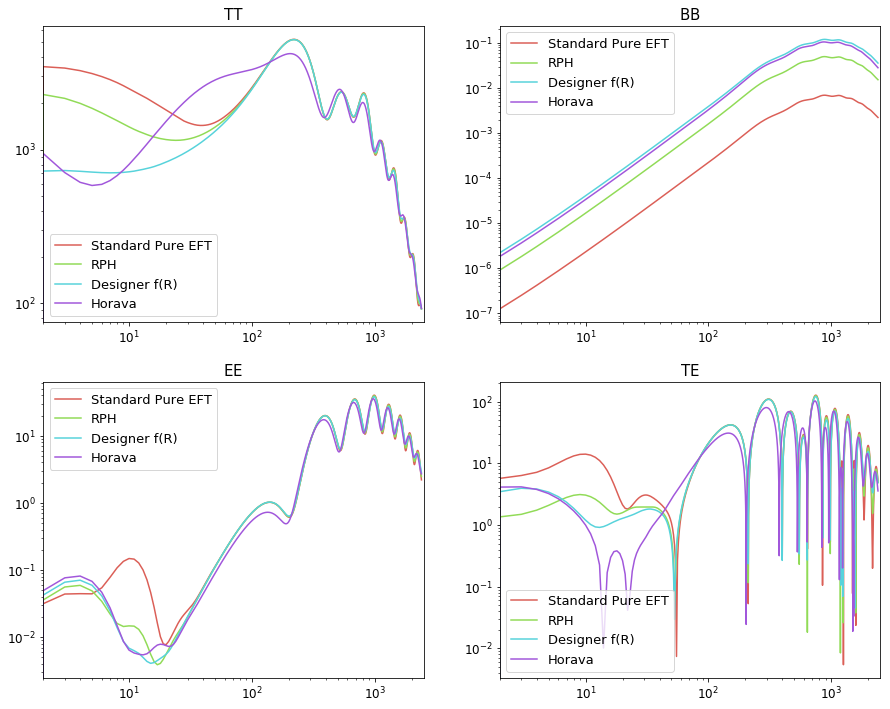

In [ ]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = sns.hls_palette(len(model))

for CLS,c,lab in zip(toplot_totCL,color,lab):
    
    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], color=c,label=lab)
    ax[0,1].loglog(ls,CLS[:,2], color=c,label=lab)
    ax[1,0].loglog(ls,CLS[:,1], color=c,label=lab)
    ax[1,1].loglog(ls,abs(CLS[:,3]), color=c,label=lab)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$BB$')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].set_title(r'$TE$');

ax[1,0].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()

for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

In [ ]:
#plot matter power spectrum varying parametrization of selected gamma function

PureEFT_gamma1 ={}

gamma1_lab = ['Zero','Constant','Linear','Power Law','Exponential']
gamma1_key = ['EFTGamma10','EFTGamma1Exp'] 
gamma1_par = [10, 0.5]


for i,gamma1 in zip(range(len(gamma1_lab)),gamma1_lab):
        PureEFT_gamma1.update({gamma1 : model['PureEFT'].copy()})
        PureEFT_gamma1[gamma1]['PureEFTmodelGamma1'] = i
        PureEFT_gamma1[gamma1].update(dict(zip(gamma1_key,gamma1_par)))

In [ ]:
toplot_matter_kh = []
toplot_matter_pk = []

for par in PureEFT_gamma1:
    EFT = camb.CAMBparams()
    EFT.set_cosmology(H0=67.3, EFTCAMB_params=PureEFT_gamma1[par])
    EFT.NonLinear = camb.model.NonLinear_both
    EFT.NonLinearModel.set_params(halofit_version='takahashi')
    
    results = camb.get_results(EFT)
    EFT.set_matter_power()
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, params = EFT) 
  
    toplot_matter_kh.append(kh)
    toplot_matter_pk.append(pk[0])

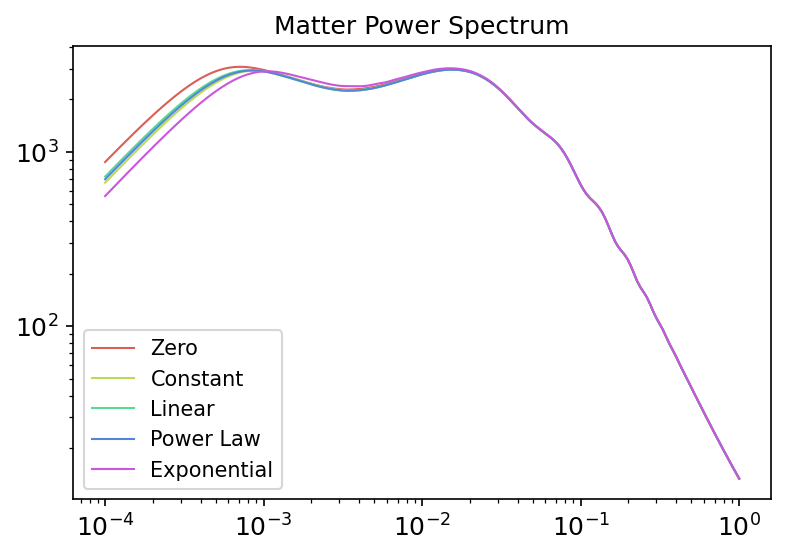

In [ ]:
color = sns.hls_palette(len(PureEFT_gamma1))

for KH, PK, c,key in zip(toplot_matter_kh, toplot_matter_pk, color, PureEFT_gamma1):
    plt.loglog(KH,PK, color=c,label=key,lw='1.0')
    plt.title(r'Matter Power Spectrum',fontsize=12)

plt.legend(fontsize=10)


## Examples with different background parametrizations in the pureEFT mode


In [ ]:
#Set list of dictionaries varying the parametrization of background 
PureEFT_DE_model ={}

DE_lab = ['LCDM','wCDM','CPL','JBL','TurnPoint','TaylorExp']
DE_key = ['EFTw0','EFTwa','EFTwn','EFTwat', 'EFTw2', 'EFTw3'] 
DE_par = [-0.5, - 0.5, 2, 0.8, 0.1, 0.1]

for i,DE in zip(range(len(DE_lab)),DE_lab):
        PureEFT_DE_model.update({DE : model['PureEFT'].copy()})
        PureEFT_DE_model[DE]['EFTwDE'] = i
        PureEFT_DE_model[DE].update(dict(zip(DE_key,DE_par)))

## Effects on matter power spectrum and CMB temperature anisotropies

In [ ]:
#Set list of things to plot 
toplot_totCL_DE = []
toplot_matter_DE_kh = []
toplot_matter_DE_pk = []

for EFTpar in PureEFT_DE_model:
    
    EFT1 = camb.CAMBparams()
    EFT1.set_cosmology(H0=67.3, EFTCAMB_params=PureEFT_DE_model[EFTpar])
    EFT1.NonLinear = camb.model.NonLinear_both
    EFT1.NonLinearModel.set_params(halofit_version='takahashi')
    results1 = camb.get_results(EFT1)
    powers =results1.get_cmb_power_spectra(EFT1, CMB_unit='muK')
    
    EFT1.set_matter_power()
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, params = EFT1) 

    totCL = powers['total']
    toplot_totCL_DE.append(totCL)
    toplot_matter_DE_kh.append(kh)
    toplot_matter_DE_pk.append(pk[0])
    

(0.0001, 1)

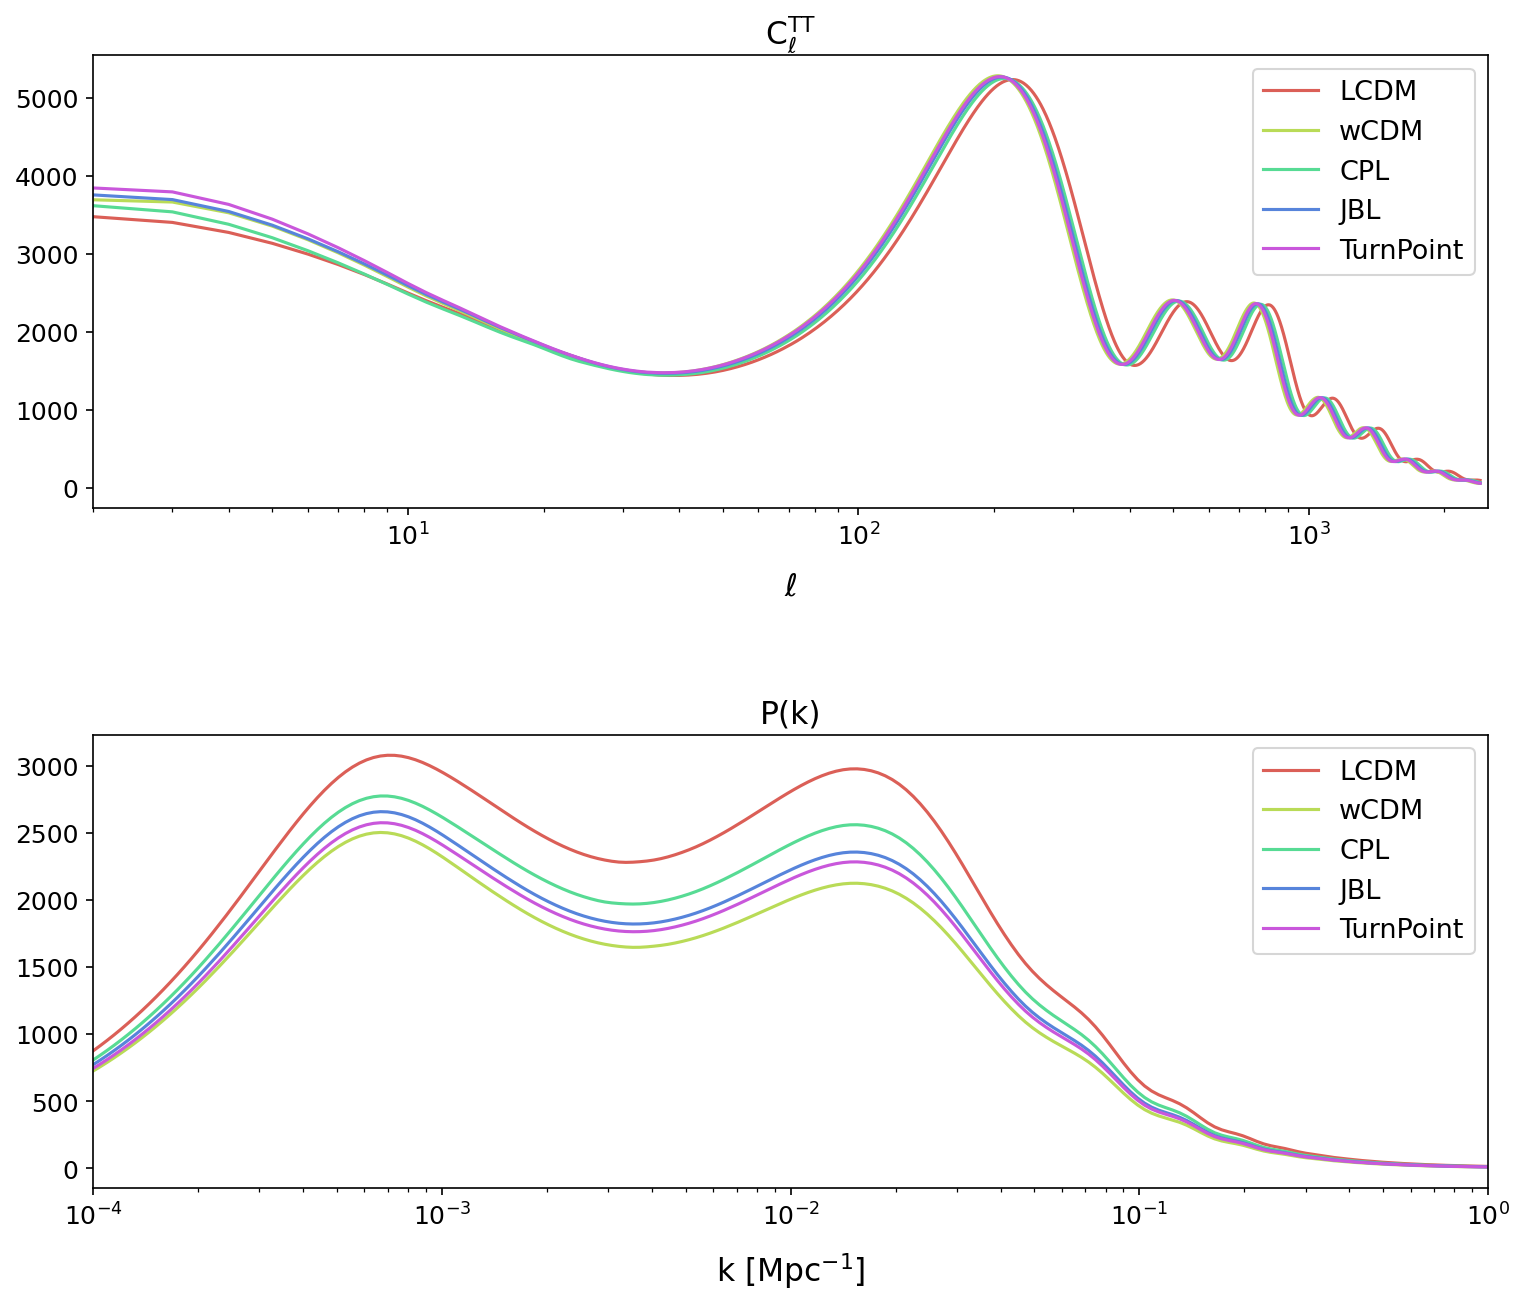

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

for CLS,KH, PK, c,key in zip(toplot_totCL_DE,toplot_matter_DE_kh, toplot_matter_DE_pk, color, PureEFT_DE_model):
    ls = np.arange(CLS.shape[0])
    ax[0].semilogx(ls,CLS[:,0], color=c,label= key)
    ax[1].semilogx(KH,PK, color=c,label=key)
    ax[0].set_title('$C_{\ell}^{TT}$',pad=5)
    ax[1].set_title(r'P(k)')
    ax[0].set_xlabel('$\ell$')
    ax[1].set_xlabel('$k\ [Mpc^{-1}]$')

plt.subplots_adjust(hspace=0.5)
    
ax[1].legend()
ax[0].legend()

ax[0].set_xlim([2,2500])
ax[1].set_xlim([0.0001,1])

## Effects on angular diameter distance and luminosity distance

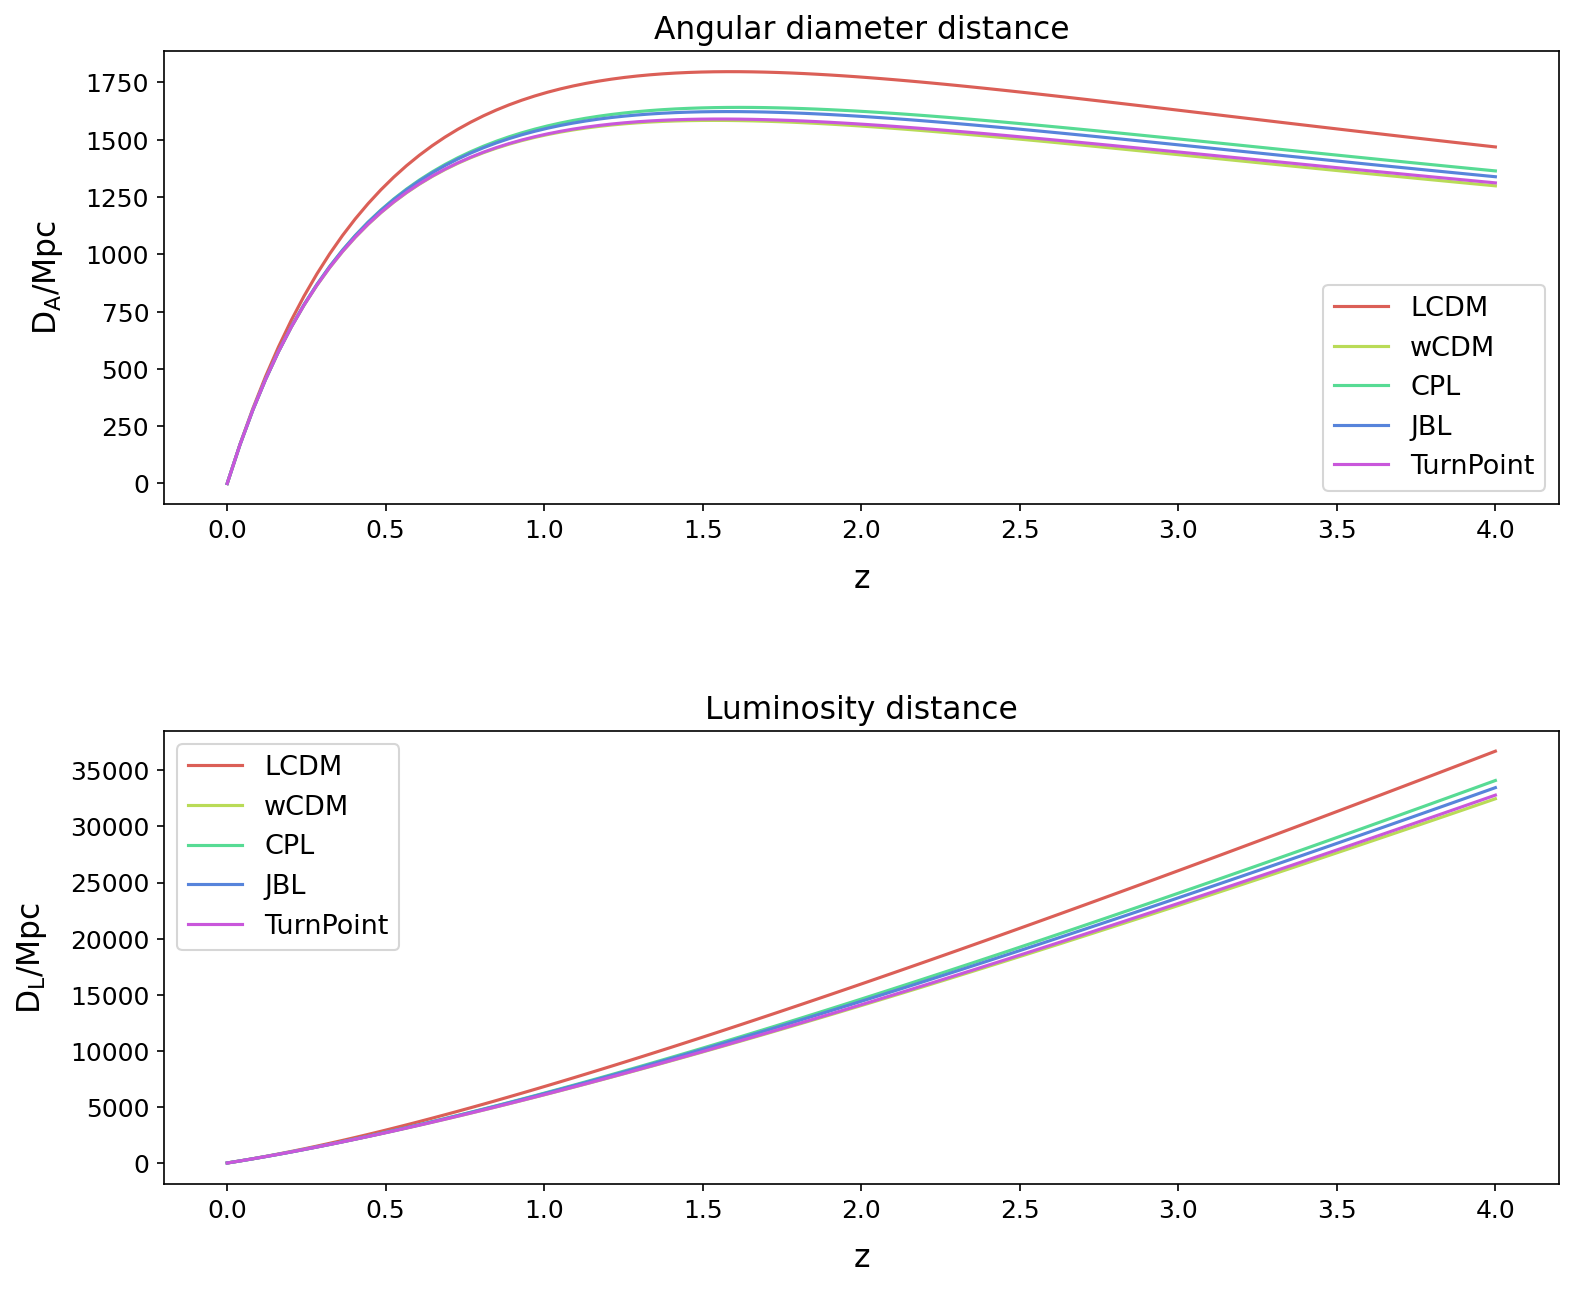

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
z = np.linspace(0,4,100)
plt.subplots_adjust(hspace=0.5)

for EFTpar, name,c in zip(PureEFT_DE_model, DE_lab,color):
    EFT = camb.set_params(H0=67.3, EFTCAMB_params=PureEFT_DE_model[EFTpar],eft_header=False)
    EFTbg = camb.get_background(EFT)
    DA = EFTbg.angular_diameter_distance(z)
    DL = EFTbg.luminosity_distance(z)
    ax[0].plot(z, DA,c=c, label = name)
    ax[0].set_xlabel('$z$')
    ax[0].set_ylabel(r'$D_A /\rm{Mpc}$')
    ax[0].set_title('Angular diameter distance')
    ax[1].plot(z, DL,c=c, label = name)
    ax[1].set_xlabel('$z$')
    ax[1].set_ylabel(r'$D_L /\rm{Mpc}$')
    ax[1].set_title('Luminosity distance')

ax[1].legend()
ax[0].legend()    

## Example of redshift evolution of $\Delta_{b}$ and $\Delta_\gamma$: GR vs full Horava gravity


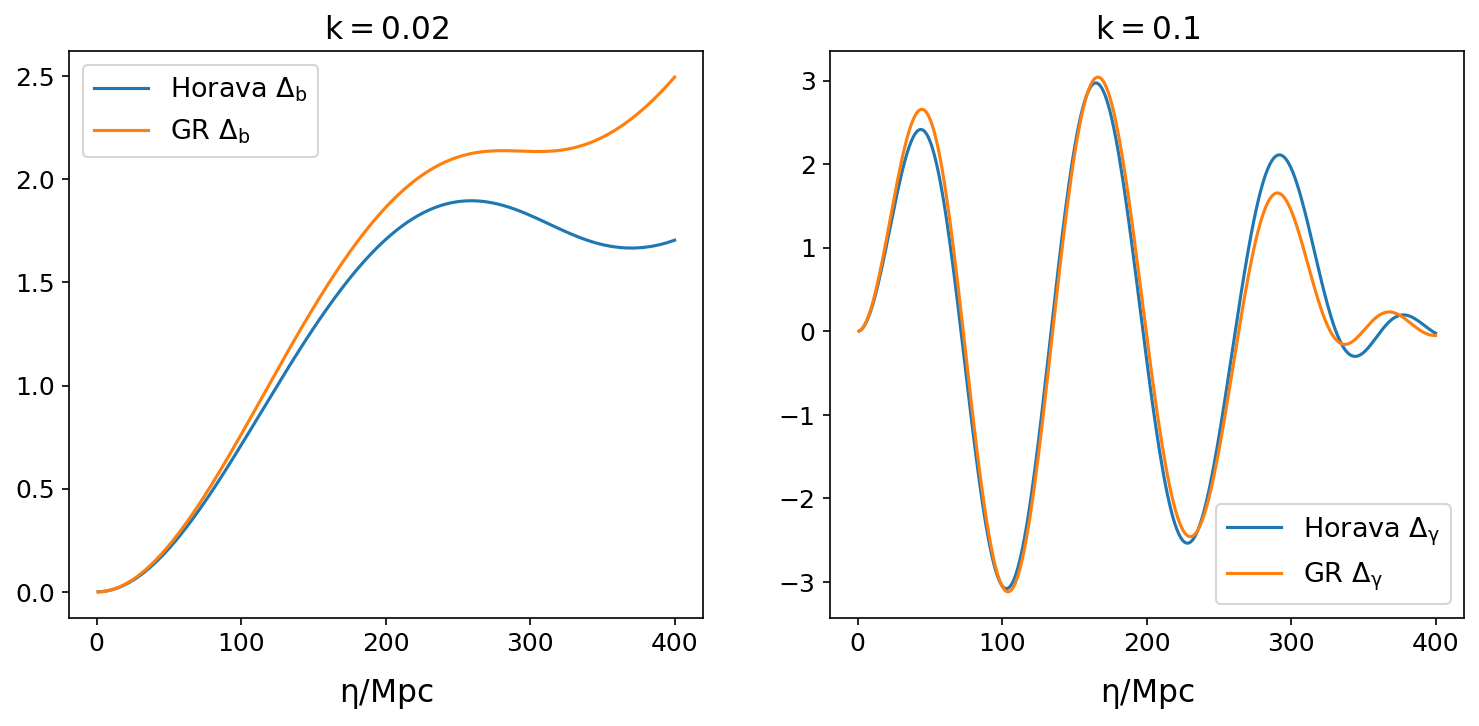

In [ ]:
pars = camb.set_params(H0=67.5)
data = camb.get_background(pars)

eta = np.linspace(1, 400, 300)
ks = [0.02,0.1]

pars.set_cosmology(H0=67.5,EFTCAMB_params=FullMapEFT_params,eft_header=False)
results = camb.get_background(pars)

ev = results.get_time_evolution(ks, eta, ['delta_baryon','delta_photon'])
fig , ax= plt.subplots(1,len(ks), figsize=(12,5))

evGR = data.get_time_evolution(ks, eta, ['delta_baryon','delta_photon'])

ax[0].plot(eta,ev[0,:, 0],label=r'Horava $\Delta_b$')
ax[1].plot(eta,ev[1,:, 1],label=r'Horava $\Delta_\gamma$')
ax[0].plot(eta,evGR[0,:, 0],label=r'GR $\Delta_b$')
ax[1].plot(eta,evGR[1,:, 1],label=r'GR $\Delta_\gamma$')
ax[1].set_title('$k= %s$'%ks[1])
ax[1].set_xlabel(r'$\eta/\rm{Mpc}$');
ax[0].set_title('$k= %s$'%ks[0])
ax[0].set_xlabel(r'$\eta/\rm{Mpc}$');


ax[0].legend();
ax[1].legend();

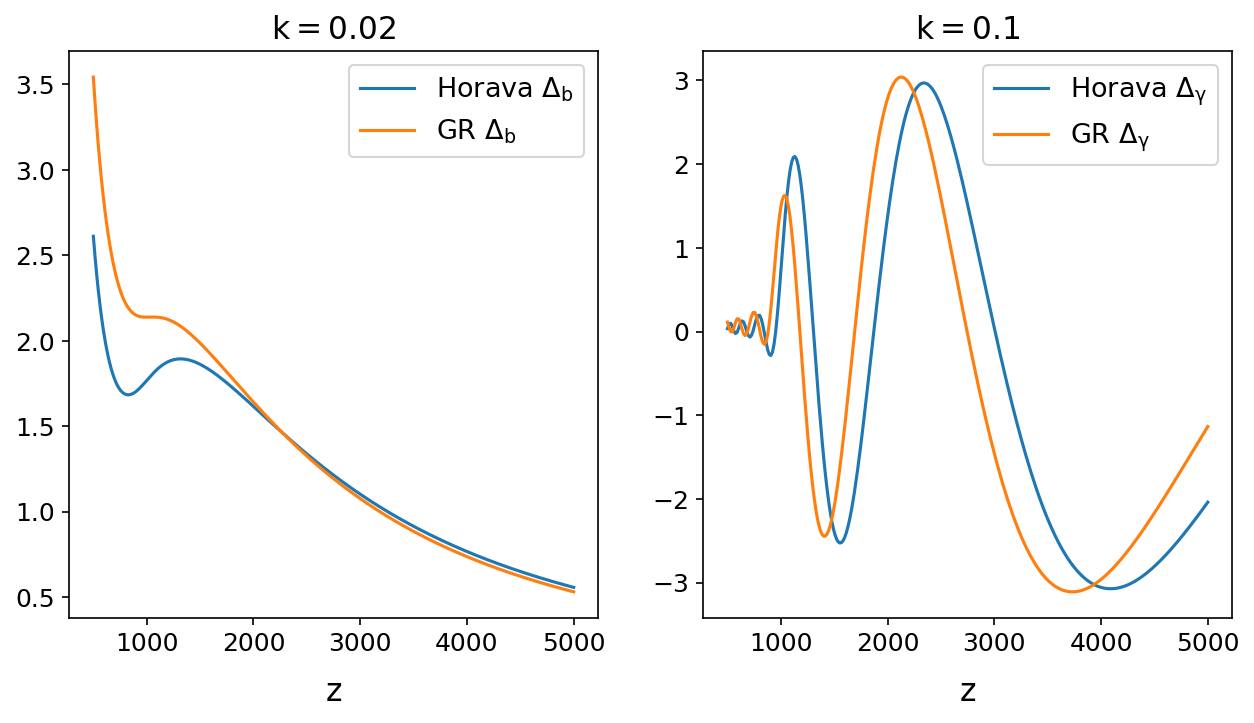

In [ ]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122,eft_header=False)

data = camb.get_background(pars)

eta = np.linspace(500,5000,300)
ks = [0.02,0.1]

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122,EFTCAMB_params=FullMapEFT_params,eft_header=False)

results = camb.get_background(pars)

ev = results.get_redshift_evolution(ks, eta,['delta_baryon', 'delta_photon'])

evGR = data.get_redshift_evolution(ks, eta, ['delta_baryon', 'delta_photon'])

_, ax= plt.subplots(1,2, figsize=(10,5))

ax[0].plot(eta,ev[0,:, 0],label=r'Horava $\Delta_b$')
ax[1].plot(eta,ev[1,:, 1],label=r'Horava $\Delta_\gamma$')
ax[0].plot(eta,evGR[0,:, 0],label=r'GR $\Delta_b$')
ax[1].plot(eta,evGR[1,:, 1],label=r'GR $\Delta_\gamma$')
ax[1].set_title('$k= %s$'%ks[1])
ax[1].set_xlabel(r'$z$');
ax[0].set_title('$k= %s$'%ks[0])
ax[0].set_xlabel(r'$z$');


ax[0].legend();
ax[1].legend();

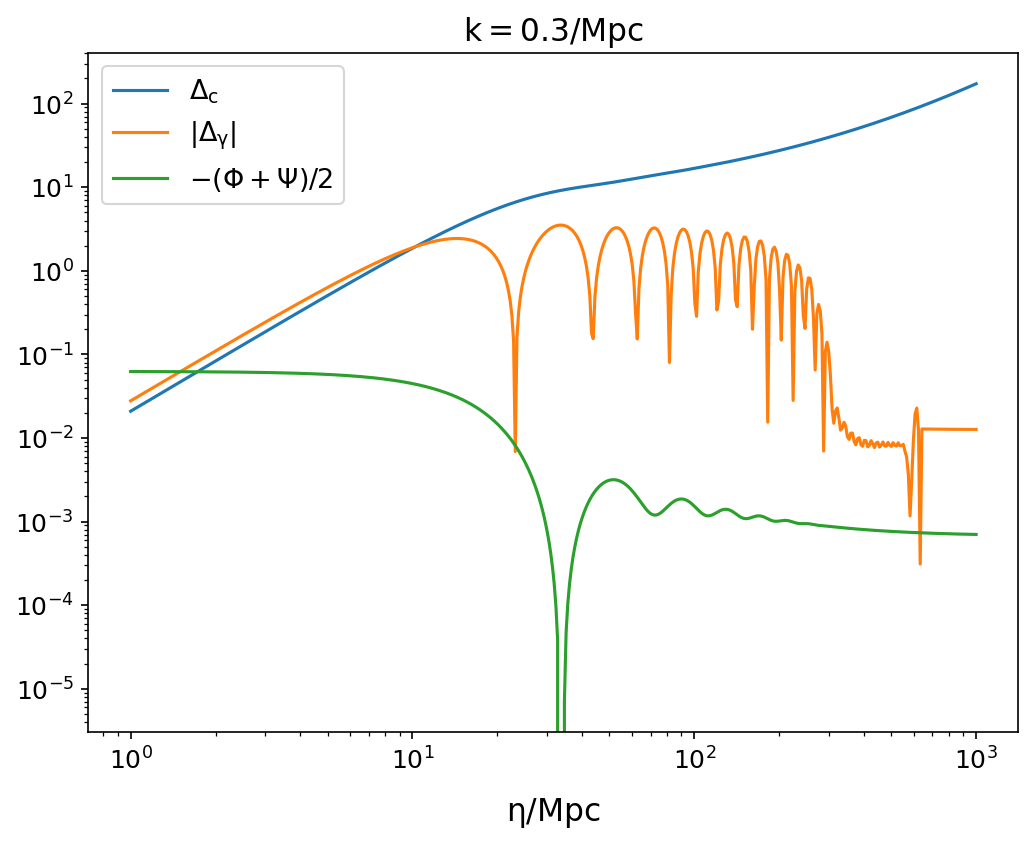

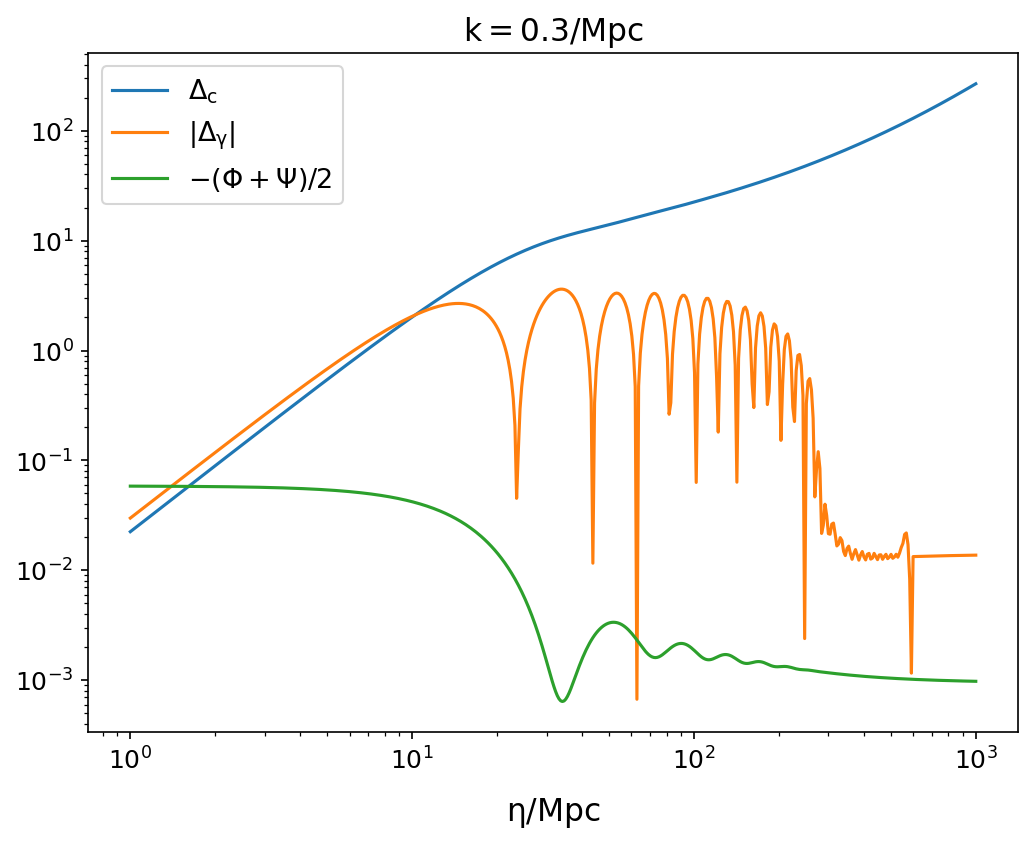

In [ ]:
#Here you can see oscillation of delta_photon, subsequent decay of the potential and change to Mezsaroz growth in delta_cdm
eta = 10**(np.linspace(0, 3, 500))
def plot_ev(ev, k):
    plt.figure(figsize=(8,6))
    plt.loglog(eta,ev[:,0])
    plt.loglog(eta,np.abs(ev[:,1]))
    plt.loglog(eta,-ev[:,2])
    plt.title(r'$k= %s/\rm{Mpc}$'%k)
    plt.xlabel(r'$\eta/\rm{Mpc}$');
    plt.legend([r'$\Delta_c$', r'$|\Delta_\gamma|$', r'$-(\Phi+\Psi)/2$'], loc = 'upper left');

k=0.3
plot_ev(results.get_time_evolution(k, eta, ['delta_cdm','delta_photon', 'Weyl']),k)
plot_ev(data.get_time_evolution(k, eta, ['delta_cdm','delta_photon', 'Weyl']),k)

# TO DO LIST

- Finire di inserire le varie parametrizzazioni e plottare anche GR per confronto (**done**)
- Inserire esempi di parametrizzazioni per la dark energy (EFTwDE, EFTw0, EFTwa etc ...) (**done**)
- Inserire un esempio di altre modifiche alle quantita' di camb (transfer function, lensing potential etc), check the eftcamb automated plotter to have an idea
- Generally improve comments and descriptions 
    - Inserire descrizione dei singoli parametri dei modelli (markdown jupyter cells)

- Fare e testare l'error handling 
- Trovare un modo per stampare l'header di eftcamb in python (**done**)
- Includere stability plot 
- plot modes at different k (**done** but k-modes crashing)
- plot lensing convergence power spectrum for different model wrt GR (may Alens be bigger than one)